In [44]:
%%capture
!pip install nltk==3.7
!pip install numpy==1.21.5
!pip install pandas==1.3.5
!pip install scikit_learn==1.0.2
!pip install tensorflow==2.19.0
!pip install torch==2.6.0
!pip install matplotlib==3.4.3

In [45]:
import re
import nltk
import time
import torch
import string
import numpy as np
import pandas as pd
import torch.nn as nn
import tensorflow as tf

In [46]:
from nltk import PorterStemmer
import torch.nn.functional as F
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', -1) # Allow full column display
nltk.download('stopwords')

/tmp/ipykernel_26266/3972145178.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # Allow full column display
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Exploring the dataset

In [47]:
#reading data
data = pd.read_csv('Data/review_data_LSTM.csv')
data.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533FmoxvwtULxu2YBbXfmhq6970jW2OET7OjXuTNPbUz82cWbAtk,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14Gg4pUoP3Bc6Lgata4x9jnR4bwKnT_eyLAMWaHs7fg,Overall it's really an amazing app. I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years? The texts were blurred and when you zoom it out it's pixelated. I thought this issue only occurs on mobile apps however it was also present on the website. Please fix this. I still remember the time when I can export high definition texts and I love that experience. Thank you!,4,528,2.116.0,2021-06-17 07:18:54,"Hi Donna. We are sorry that your text or design turned out pixelated or poor quality. Check this link for possible reasons: https://bit.ly/2Pxkphr. For other concerns, report it at canva.me/android. Regards. - Ahn\n",2021-06-19 21:24:32
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-F1hD4TQaLg-fgsVyTLNaHOWFpVUEtAgJ-9ynp_vKWE3Y,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14Ghv6nzkP8W4xDBH0PfDbiDNSxlKbWGh_6s6U3avzg,Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaN


In [48]:
# Find information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1500 non-null   object
 1   userName              1500 non-null   object
 2   userImage             1500 non-null   object
 3   content               1500 non-null   object
 4   score                 1500 non-null   int64 
 5   thumbsUpCount         1500 non-null   int64 
 6   reviewCreatedVersion  1500 non-null   object
 7   at                    1500 non-null   object
 8   replyContent          523 non-null    object
 9   repliedAt             523 non-null    object
dtypes: int64(2), object(8)
memory usage: 117.3+ KB


In [49]:
data = data[['content','score']]
data

,content,score
0,Overall it's really an amazing app. I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years? The texts were blurred and when you zoom it out it's pixelated. I thought this issue only occurs on mobile apps however it was also present on the website. Please fix this. I still remember the time when I can export high definition texts and I love that experience. Thank you!,4
1,Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤,5
2,"Canva used to be a good app! But recently I've been facing issues in saving my files. When I want my files to be saved in '.png' format, it gets saved in .jpg format! Moreover when I want my files to be saved it gets stuck at the downloading screen (where your so called magic does not happen) For now you'll be getting 1 stars from me. I hope you will fix the app soon! Thank you .",1
3,"It's a brilliant app, but I have just one problem, if I'm editing a post and I double tap the photo to reposition, if I then start to zoom the photo, 8 times out of 10 my app crashes and restarts, this is on my LG G5 SE, sometimes I've had to go over to the desktop version on my PC just to reposition and zoom the photo where I want it to then resume editing back on my mobile.",5
4,"This was such a great app. I used to make BTS memes through this. But after recent update... I'm not able to change my font style. The edit option of font is missing. I tried uninstalling and installing the app, but still it's isn't working. The edit option for font is appearing very rarely. The previous version was far better. Canva could you please work on it! 💜",4
...,...,...
1495,Absolutely amazing and a lifesaver for teachers.,5
1496,Very nice but many a times shows error opening the ppt. This was my school project and now has disturbed me.,3
1497,Too much lag. Always stuck on starting page. Worst app. Don't download,1
1498,Nice app for all college work. So many features and templates to work with. Loved it❤️,5


### Function to Clean the Text

In [50]:
 # Defining a Function to Clean the Textual Data
 
def clean_text(txt):
    
  txt = txt.lower() #Lowering the text
  txt = re.sub(r'\W', ' ', str(txt)) # remove all special characters 
  txt = txt.translate(str.maketrans('', '', string.punctuation)) # remove punctuations
  txt = ''.join([i for i in txt if not i.isdigit()]).strip() # remove digits ()
  txt = re.sub(r'\s+[a-zA-Z]\s+', ' ', txt)   # remove all single characters 
  txt = re.sub(r'\s+', ' ', txt, flags=re.I) # Substituting multiple spaces with single space
  txt = re.sub(r"(http\S+|http)", "", txt) # remove links
  txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") if word not in stopwords.words('english') ]) # stem & remove stop words
  return txt


In [51]:
 #Compare original text with the cleaned text 

print('Original Text : ',data['content'][1])  
print('\n')
print('Processed Text : ',clean_text(data['content'][1]))

Original Text :  Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤


Processed Text :  hey ye gave star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came thank develop beauti app facil liter find almost everyth need best part even without premium featur provid us lot mani facil love thank


In [52]:
 # Clean the dataset using the defined function
data['content'] = data['content'].apply(clean_text) #apply the function to every text in the dataset
data

,content,score
0,overal realli amaz app use past year howev one issu though want get address sinc think issu last mani year text blur zoom pixel thought issu occur mobil app howev also present websit pleas fix still rememb time export high definit text love experi thank,4
1,hey ye gave star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came thank develop beauti app facil liter find almost everyth need best part even without premium featur provid us lot mani facil love thank,5
2,canva use good app recent face issu save file want file save png format get save jpg format moreov want file save get stuck download screen call magic happen get star hope fix app soon thank,1
3,brilliant app one problem edit post doubl tap photo reposit start zoom photo time app crash restart lg se sometim go desktop version pc reposit zoom photo want resum edit back mobil,5
4,great app use make bt meme recent updat abl chang font style edit option font miss tri uninstal instal app still work edit option font appear rare previou version far better canva could pleas work,4
...,...,...
1495,absolut amaz lifesav teacher,5
1496,nice mani time show error open ppt school project disturb,3
1497,much lag alway stuck start page worst app download,1
1498,nice app colleg work mani featur templat work love,5


In [53]:
# Distribution of classes of the target variable score
print(data.score.value_counts())

5    952
4    227
1    170
3    91 
2    60 
Name: score, dtype: int64


Since the dataset is imbalanced, thus should be balanced by resampling.

### Preprocessing data

In [54]:
# Divide the dataset to each class before resampling

df_majority = data[data['score']==5] 
df_minority1= data[data['score']==2] 
df_minority2 = data[data['score']==3]
df_minority3 = data[data['score']==1] 
df_minority4 = data[data['score']==4]

In [55]:
#Upsampling the minority class and downsampling the majority class

#Down Sampling Majority Class "5"
df_majority_downsampled = resample(df_majority,replace=False,n_samples = 600)

#Upsample Minority class  "2"
df_minority_upsampled1 = resample(df_minority1,replace=True,n_samples = 200)

#Upsample Minority class "3"
df_minority_upsampled2 = resample(df_minority2,replace=True,n_samples=300)

#Upsample Minority class "1"
df_minority_upsampled3 = resample(df_minority3,replace=True,n_samples=225)

#Upsample Minority class "4"
df_minority_upsampled4 = resample(df_minority4,replace=True,n_samples=250)


# Combine upsampled minority class with downsampled majority class
data1 = pd.concat([df_majority_downsampled, df_minority_upsampled4,df_minority_upsampled1,df_minority_upsampled2,df_minority_upsampled3])


In [56]:
data1.score.value_counts()

5    600
3    300
4    250
1    225
2    200
Name: score, dtype: int64

In [79]:
# Defining parameters and Tokenizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# The maximum number of words to be used. (most frequent)
top_length = 2000
# Max number of words in each Content.
input_lengh = 600
# This is fixed. Embedding
embedding_dim = 100
tokenizer = Tokenizer(num_words=input_lengh, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data1['content'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1307 unique tokens.


In [59]:
 #Tokenizing the content
 
X = tokenizer.texts_to_sequences(data1['content'].values)
X = pad_sequences(X, maxlen=input_lengh)
print('Shape of data tensor:', X.shape[1])

Shape of data tensor: 600


### Preparing data for training 

In [67]:
 # Encoding categorical variable "Score"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data1['score'])
print(Y.shape)
print(le.classes_)
Y.dtype

(1575,)
[1 2 3 4 5]


dtype('int64')

In [68]:
 #Train,Test and validation Splits

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 42, stratify=Y)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42, stratify=Y_train)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_val.shape,Y_val.shape)

(1275, 600) (1275,)
(158, 600) (158,)
(142, 600) (142,)


In [66]:
 # Converting data into Torch ( not using a GPU in this project, so tensors are retained in the CPU)
x_train = torch.tensor(X_train, dtype=torch.long)
y_train = torch.tensor(Y_train, dtype=torch.long)
x_cv = torch.tensor(X_val, dtype=torch.long)
y_cv = torch.tensor(Y_val, dtype=torch.long)

In [69]:
# converting dataset to  atocrh Dataset
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

In [70]:
# Defing the Parameters for the model:
max_features =  2000  
batch_size = 50
vocab_size = max_features # Total number of unique words in the  vocabulary

# Initialising the DataLoaders
train_dl = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
val_dl = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

### Model Building

In [73]:

class LSTM(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) : # embedding_dim = size of each word's vector representation 
        #hidden_dim = number of units in the hidden layer
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0) # Padding_idx = padding tokens don't learn 
        self.drop  = nn.Dropout(p=0.2)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.lstm1 = nn.LSTM(hidden_dim, 64, batch_first=True)
        self.linear = nn.Linear(64, 5)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.embeddings(x)
        #x = self.drop(x)
        out_pack, (ht, ct) = self.lstm(x)
        out_pack1, (ht, ct) = self.lstm1(out_pack)
        out = self.linear(ht[-1])
        out = self.softmax(out)
        return out

In [74]:
#intializing model
model = LSTM(vocab_size, 128,64)
print(model)

LSTM(
  (embeddings): Embedding(2000, 128, padding_idx=0)
  (drop): Dropout(p=0.2, inplace=False)
  (lstm): LSTM(128, 64, batch_first=True)
  (lstm1): LSTM(64, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=1)
)


### Model Tranining And Validation

In [81]:
# Defining Train Loop:

n_epochs = 10

loss_fn = nn.CrossEntropyLoss() # Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Optimiser

## If using GPU , move the model.
# model.cuda() # Moving Model Into GPU
# loss_fn.cuda() # Moving Loss Function Into GPU

train_loss = []
valid_loss = []
for epoch in range(n_epochs):
      start_time = time.time()

    # Set model to train configuration
      model.train() # indicator for training
      avg_loss = 0.  
      for i, (x_batch, y_batch) in enumerate(train_dl):
          y_pred = model(x_batch) # forwad pass/ prediction
        

          # Compute loss
          loss = loss_fn(y_pred, y_batch)
          optimizer.zero_grad()
          loss.backward() 
          optimizer.step()
          avg_loss += loss.item() / len(train_dl) # using loss.item() retrieves the scalar loss
          

      # Set model to validation configuration
      model.eval() # Indicator for Validation       
      avg_val_loss = 0.
      val_preds = np.zeros((len(x_cv),len(le.classes_)))# Ensures predictions have correct shape before filling with actual outputs
    
      for i, (x_batch, y_batch) in enumerate(val_dl):
          y_pred = model(x_batch).detach() # saves memory from gradient computing (predictons not intefere with trainining) 
          avg_val_loss += loss_fn(y_pred, y_batch).item() / len(val_dl)

           #keep/store predictions

          val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy() # store in cpu as numpy arrays for easier storing and processing 
          
          # Check Accuracy
      val_accuracy = sum(val_preds.argmax(axis=1)==Y_val)/len(Y_val)
      train_loss.append(avg_loss)
      valid_loss.append(avg_val_loss)
      elapsed_time = time.time() - start_time 
      print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))


/tmp/ipykernel_26266/504418151.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy() # store in cpu as numpy arrays for easier storing and processing


Epoch 1/10 	 loss=1.0327 	 val_loss=1.1413  	 val_acc=0.7606  	 time=11.35s
Epoch 2/10 	 loss=1.0219 	 val_loss=1.1275  	 val_acc=0.7817  	 time=13.04s
Epoch 3/10 	 loss=1.0127 	 val_loss=1.1354  	 val_acc=0.7535  	 time=11.32s
Epoch 4/10 	 loss=1.0076 	 val_loss=1.1294  	 val_acc=0.7746  	 time=11.93s
Epoch 5/10 	 loss=1.0090 	 val_loss=1.1240  	 val_acc=0.7606  	 time=11.82s
Epoch 6/10 	 loss=1.0045 	 val_loss=1.1395  	 val_acc=0.7465  	 time=17.38s
Epoch 7/10 	 loss=1.0065 	 val_loss=1.1303  	 val_acc=0.7606  	 time=11.93s
Epoch 8/10 	 loss=1.0001 	 val_loss=1.1168  	 val_acc=0.7817  	 time=11.33s
Epoch 9/10 	 loss=1.0003 	 val_loss=1.1017  	 val_acc=0.8099  	 time=11.31s
Epoch 10/10 	 loss=0.9970 	 val_loss=1.1063  	 val_acc=0.7958  	 time=13.22s


### Plotting the Loss

In [80]:
#loss vs epoch graph
def plot_graph(epochs):
    fig = plt.figure(figsize=(12,12))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train') 
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation') 
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')

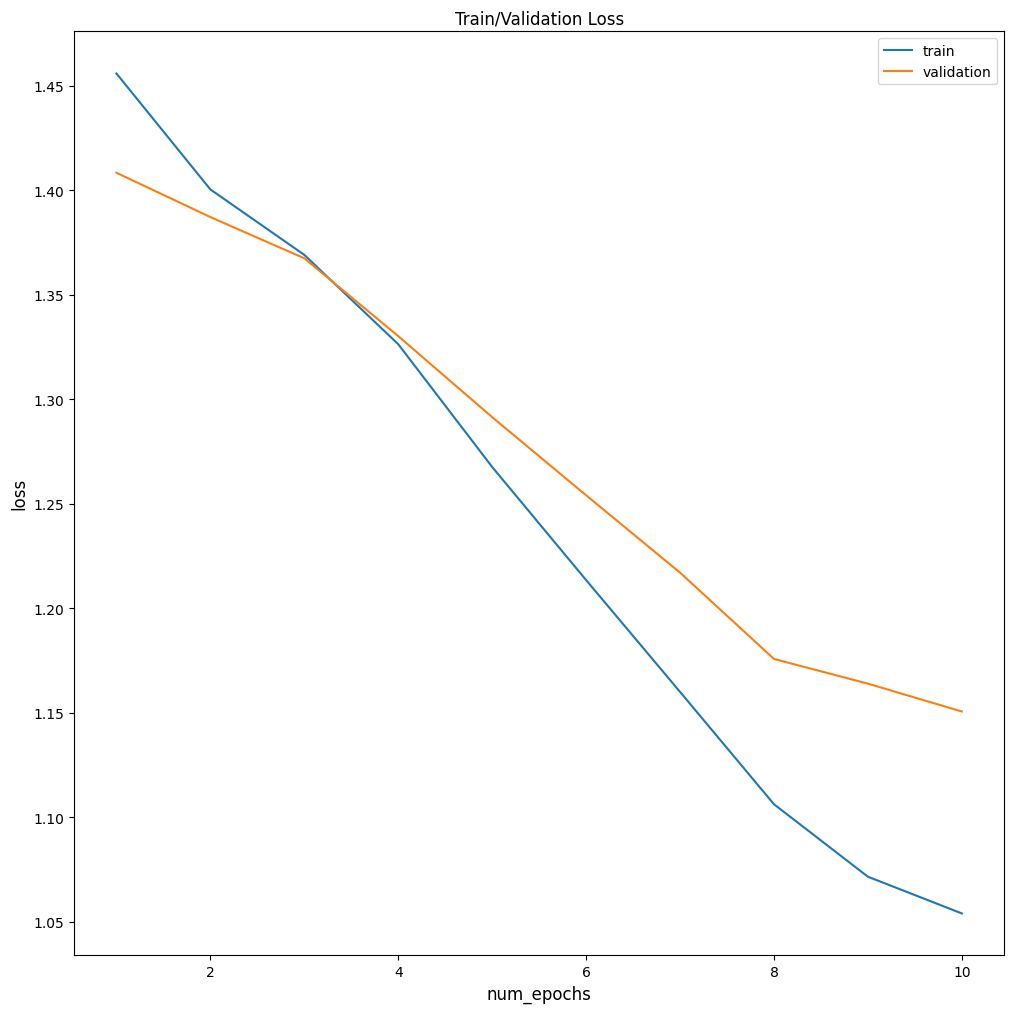

In [78]:
plot_graph(n_epochs)